<a href="https://colab.research.google.com/github/Bborub/bk-bridge-pedestrian/blob/main/SMA_BS_Sig_18Oct23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SMA=Simple Moving Average

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


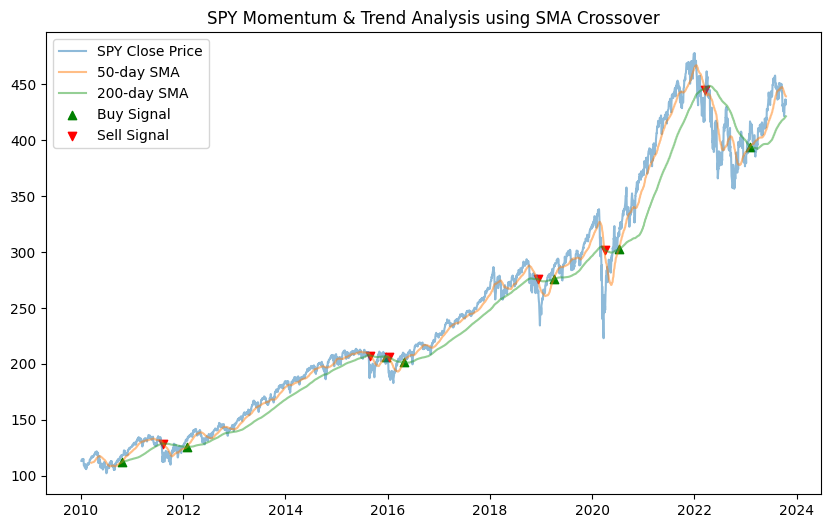

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def fetch_data(ticker_symbol):
    # Fetch historical data
    data = yf.download(ticker_symbol, start="2010-01-01", end="2023-10-17")
    return data['Close']

def sma_crossover(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window).mean()
    signals['long_mavg'] = data.rolling(window=long_window).mean()

    # Create signals
    signals['signal'] = 0.0
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                                > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    return signals

# Fetch data for SPY and QQQ
spy_data = fetch_data('SPY')
qqq_data = fetch_data('QQQ')

# Generate signals for SPY and QQQ
spy_signals = sma_crossover(spy_data)
qqq_signals = sma_crossover(qqq_data)

# Plotting for SPY (similar can be done for QQQ)
plt.figure(figsize=(10,6))
plt.plot(spy_data, label='SPY Close Price', alpha=0.5)
plt.plot(spy_signals['short_mavg'], label='50-day SMA', alpha=0.5)
plt.plot(spy_signals['long_mavg'], label='200-day SMA', alpha=0.5)
plt.scatter(spy_signals[spy_signals['positions'] == 1].index,
            spy_signals['short_mavg'][spy_signals['positions'] == 1],
            label='Buy Signal', marker='^', color='g', alpha=1)
plt.scatter(spy_signals[spy_signals['positions'] == -1].index,
            spy_signals['short_mavg'][spy_signals['positions'] == -1],
            label='Sell Signal', marker='v', color='r', alpha=1)
plt.title('SPY Momentum & Trend Analysis using SMA Crossover')
plt.legend()
plt.show()


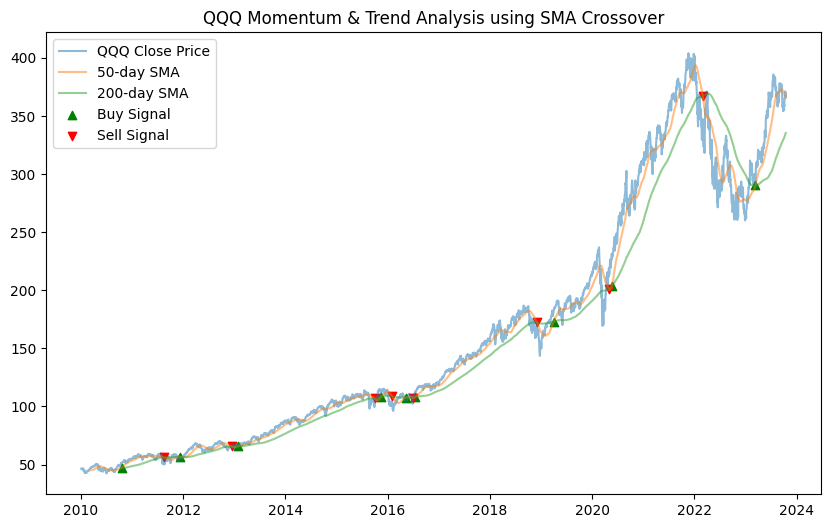

In [3]:
# Plotting for QQQ
plt.figure(figsize=(10,6))
plt.plot(qqq_data, label='QQQ Close Price', alpha=0.5)
plt.plot(qqq_signals['short_mavg'], label='50-day SMA', alpha=0.5)
plt.plot(qqq_signals['long_mavg'], label='200-day SMA', alpha=0.5)
plt.scatter(qqq_signals[qqq_signals['positions'] == 1].index,
            qqq_signals['short_mavg'][qqq_signals['positions'] == 1],
            label='Buy Signal', marker='^', color='g', alpha=1)
plt.scatter(qqq_signals[qqq_signals['positions'] == -1].index,
            qqq_signals['short_mavg'][qqq_signals['positions'] == -1],
            label='Sell Signal', marker='v', color='r', alpha=1)
plt.title('QQQ Momentum & Trend Analysis using SMA Crossover')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


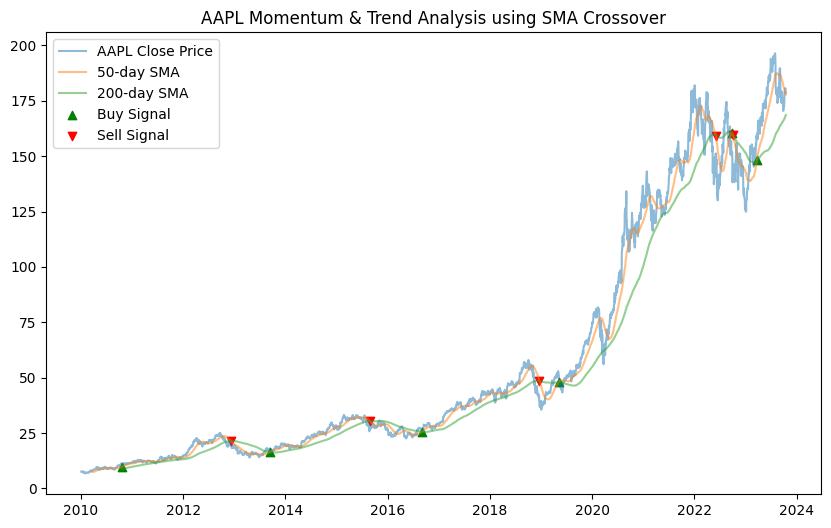

[*********************100%%**********************]  1 of 1 completed


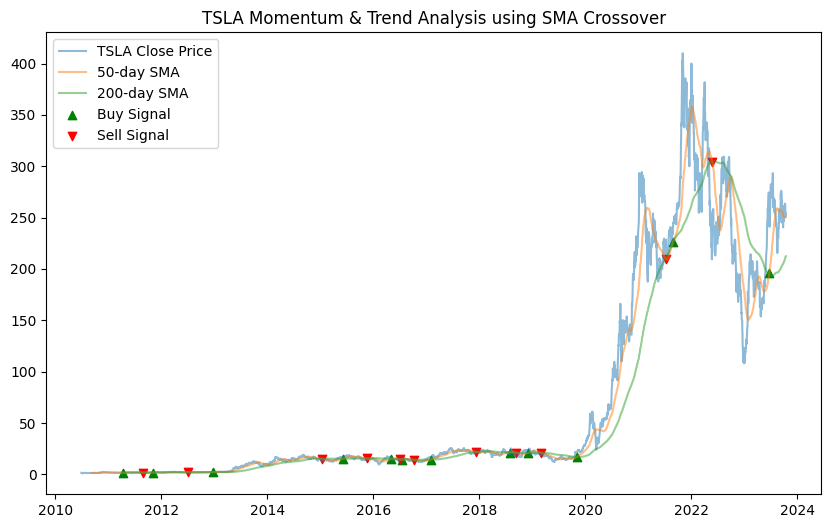

[*********************100%%**********************]  1 of 1 completed


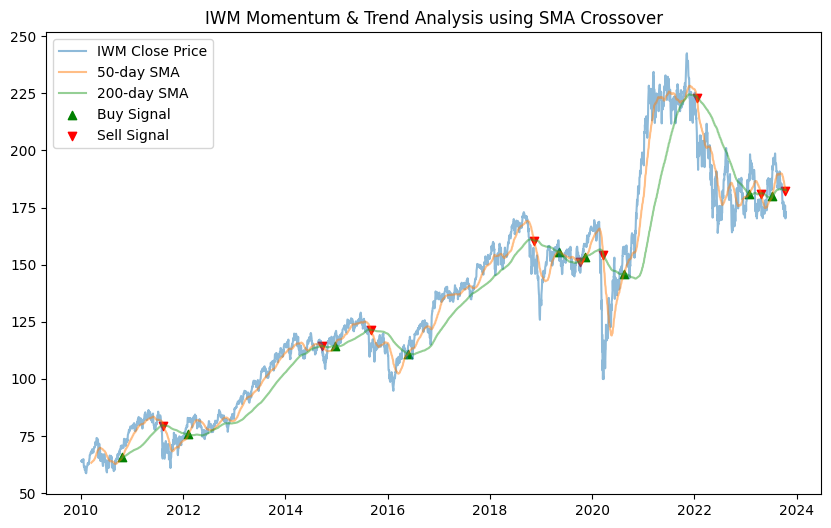

[*********************100%%**********************]  1 of 1 completed


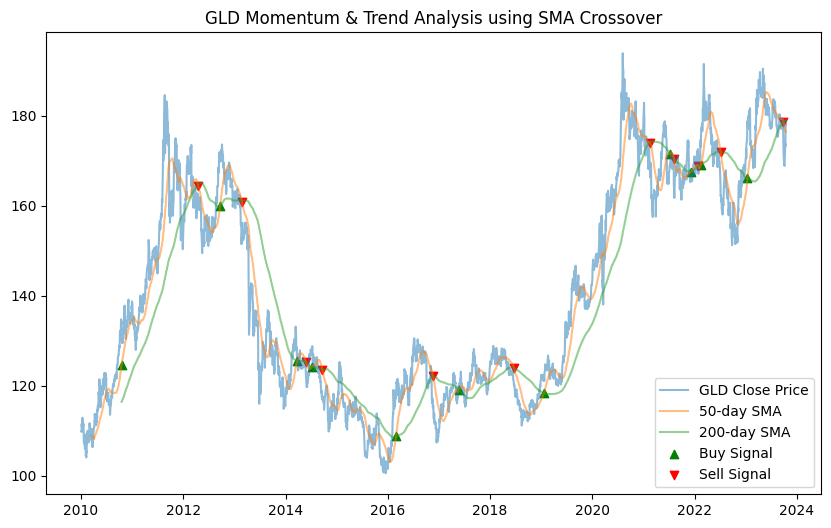

[*********************100%%**********************]  1 of 1 completed


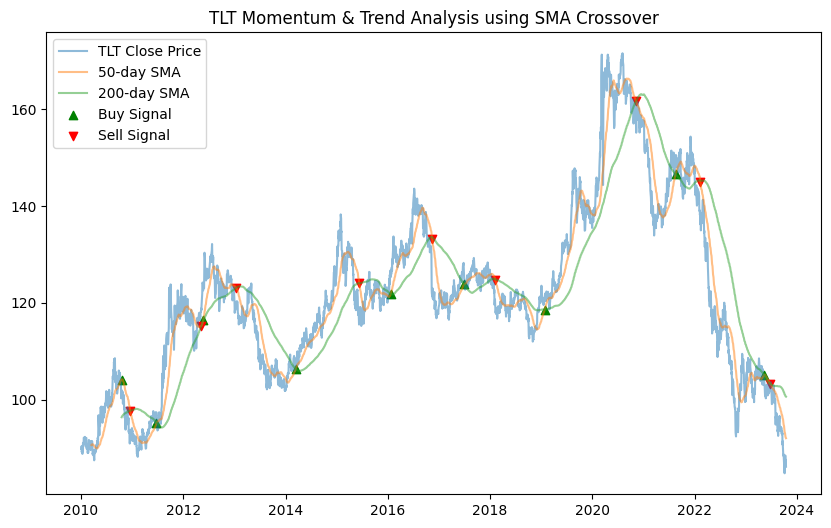

[*********************100%%**********************]  1 of 1 completed


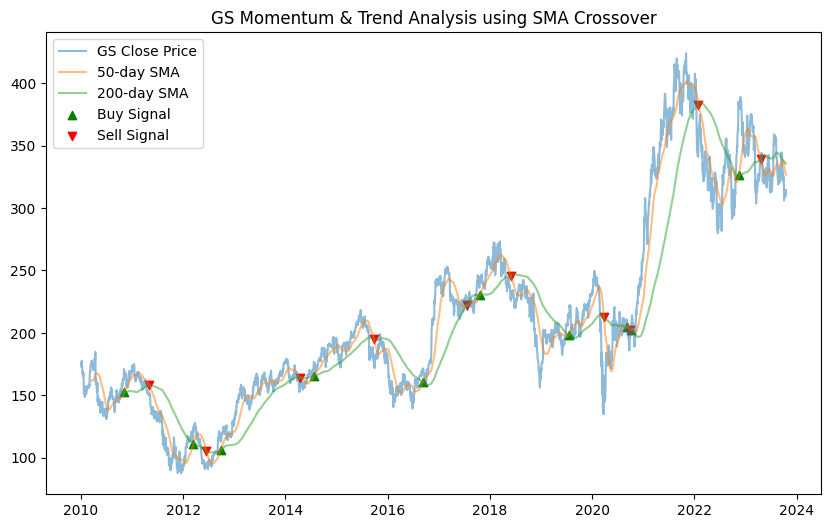

In [5]:
tickers = ['AAPL', 'TSLA', 'IWM', 'GLD', 'TLT', 'GS']

for ticker in tickers:
    # Fetch data
    data = fetch_data(ticker)

    # Generate signals
    signals = sma_crossover(data)

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(data, label=f'{ticker} Close Price', alpha=0.5)
    plt.plot(signals['short_mavg'], label='50-day SMA', alpha=0.5)
    plt.plot(signals['long_mavg'], label='200-day SMA', alpha=0.5)
    plt.scatter(signals[signals['positions'] == 1].index,
                signals['short_mavg'][signals['positions'] == 1],
                label='Buy Signal', marker='^', color='g', alpha=1)
    plt.scatter(signals[signals['positions'] == -1].index,
                signals['short_mavg'][signals['positions'] == -1],
                label='Sell Signal', marker='v', color='r', alpha=1)
    plt.title(f'{ticker} Momentum & Trend Analysis using SMA Crossover')
    plt.legend()
    plt.show()


[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-0cb20f68fe36>:19: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  signals.loc[short_window:, 'signal'] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)


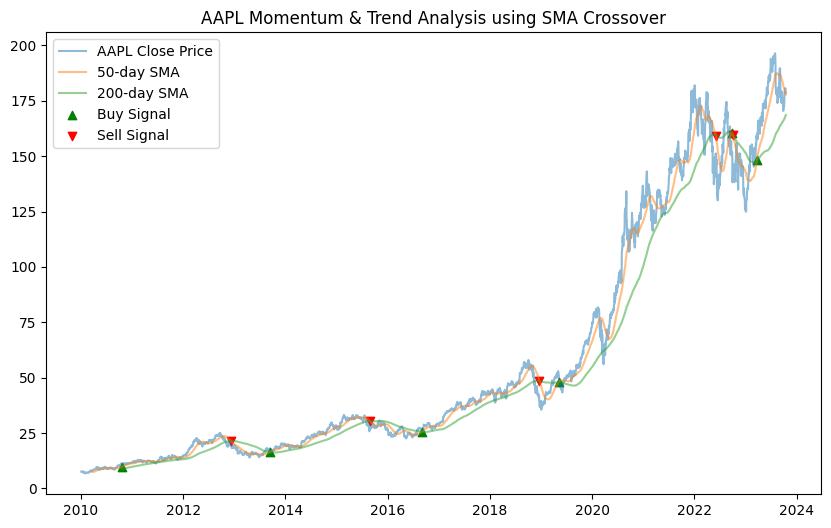

[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-0cb20f68fe36>:19: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  signals.loc[short_window:, 'signal'] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)


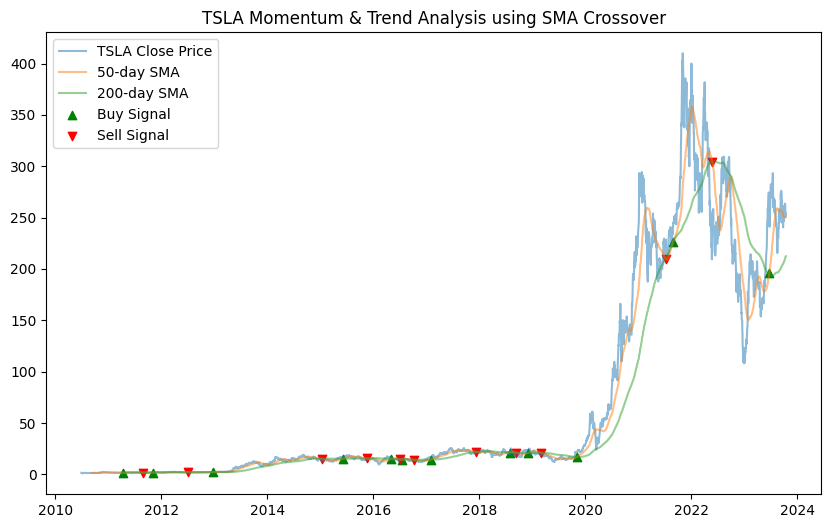

[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-0cb20f68fe36>:19: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  signals.loc[short_window:, 'signal'] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)


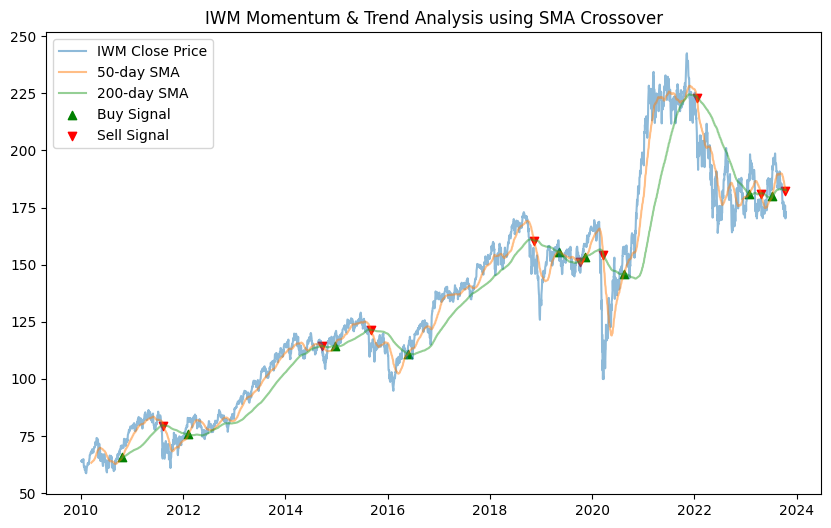

[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-0cb20f68fe36>:19: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  signals.loc[short_window:, 'signal'] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)


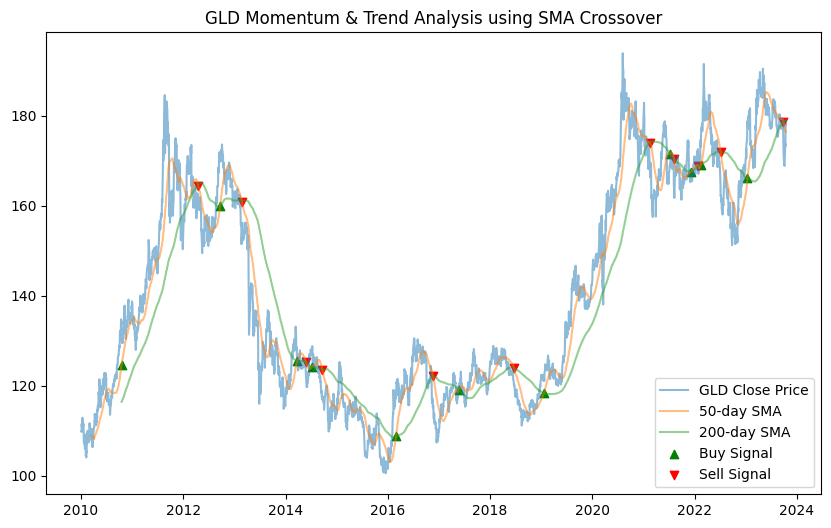

[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-0cb20f68fe36>:19: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  signals.loc[short_window:, 'signal'] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)


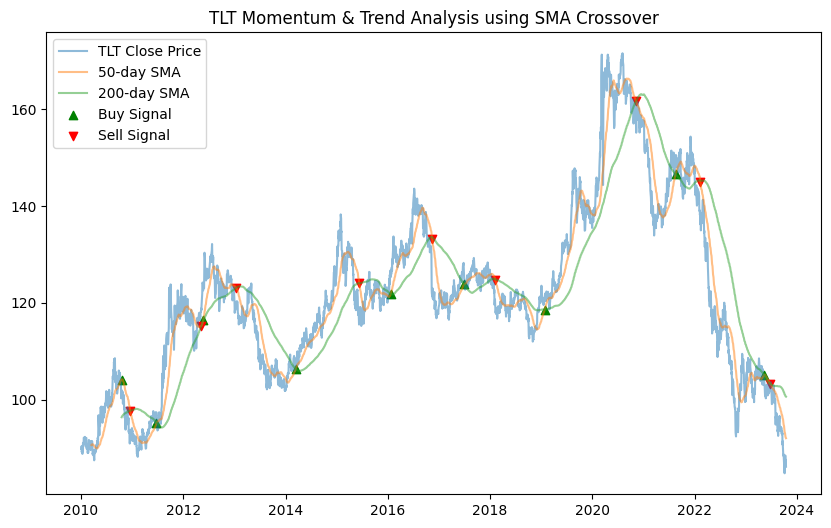

[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-0cb20f68fe36>:19: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  signals.loc[short_window:, 'signal'] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)


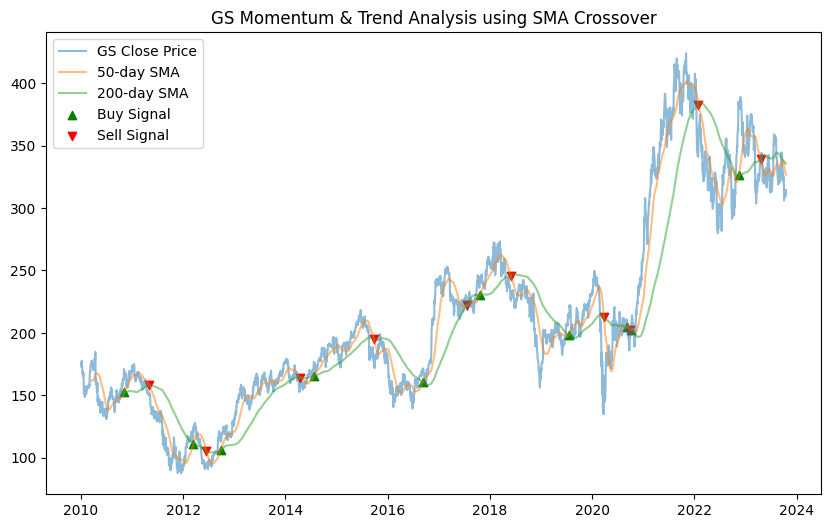

In [6]:
# Use this code, has corrections

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_data(ticker_symbol):
    # Fetch historical data
    data = yf.download(ticker_symbol, start="2010-01-01", end="2023-10-17")
    return data['Close']

def sma_crossover(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window).mean()
    signals['long_mavg'] = data.rolling(window=long_window).mean()

    # Create signals
    signals['signal'] = 0.0
    signals.loc[short_window:, 'signal'] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    return signals

tickers = ['AAPL', 'TSLA', 'IWM', 'GLD', 'TLT', 'GS']

for ticker in tickers:
    # Fetch data
    data = fetch_data(ticker)

    # Generate signals
    signals = sma_crossover(data)

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(data, label=f'{ticker} Close Price', alpha=0.5)
    plt.plot(signals['short_mavg'], label='50-day SMA', alpha=0.5)
    plt.plot(signals['long_mavg'], label='200-day SMA', alpha=0.5)
    plt.scatter(signals[signals['positions'] == 1.0].index,
                signals['short_mavg'][signals['positions'] == 1.0],
                label='Buy Signal', marker='^', color='g', alpha=1)
    plt.scatter(signals[signals['positions'] == -1.0].index,
                signals['short_mavg'][signals['positions'] == -1.0],
                label='Sell Signal', marker='v', color='r', alpha=1)
    plt.title(f'{ticker} Momentum & Trend Analysis using SMA Crossover')
    plt.legend()
    plt.show()


This code below fixes problem noted above regarding "Future Warning". It updates the problematic line in the "sma_crossover" function.

[*********************100%%**********************]  1 of 1 completed


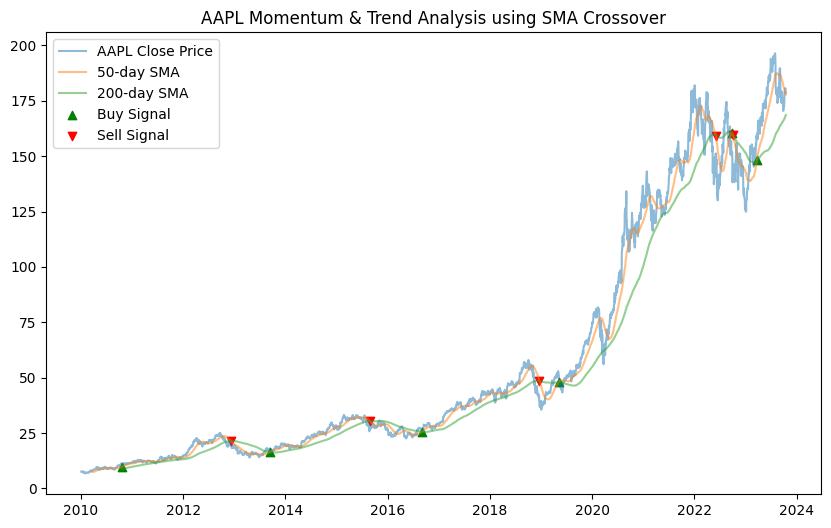

[*********************100%%**********************]  1 of 1 completed


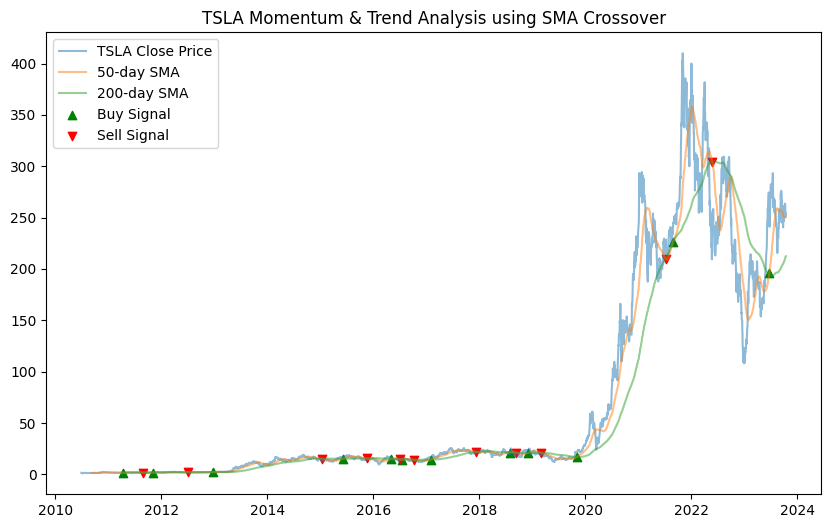

[*********************100%%**********************]  1 of 1 completed


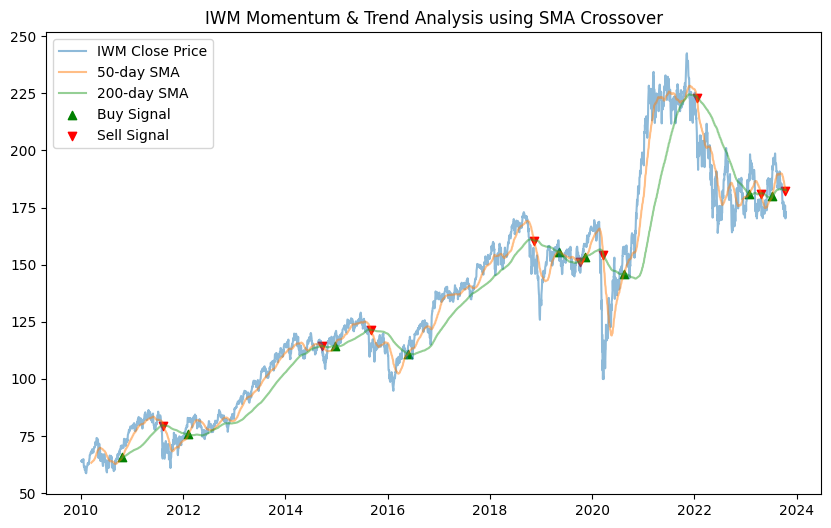

[*********************100%%**********************]  1 of 1 completed


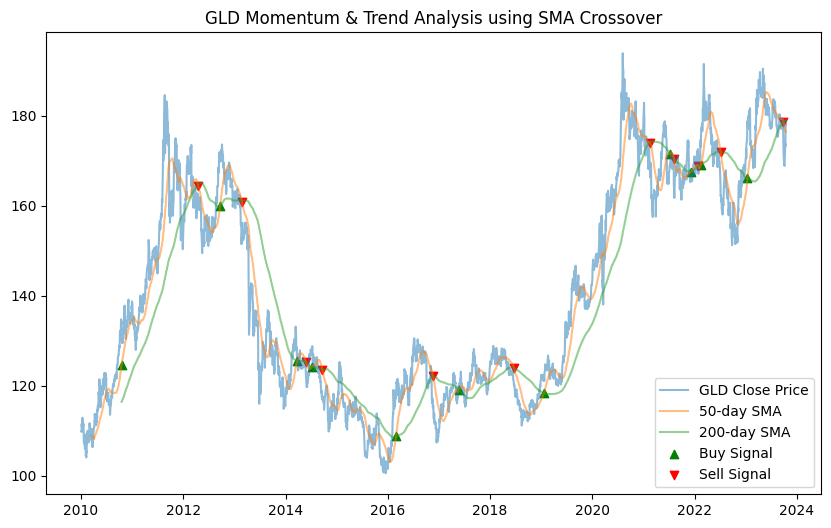

[*********************100%%**********************]  1 of 1 completed


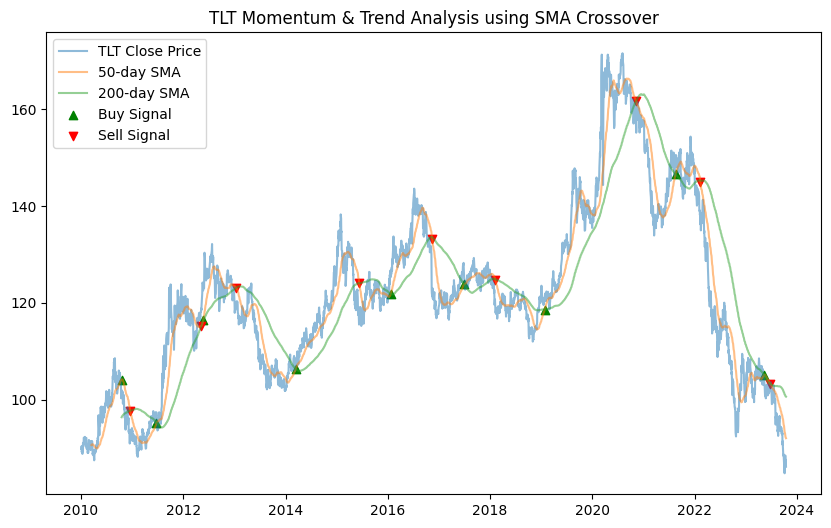

[*********************100%%**********************]  1 of 1 completed


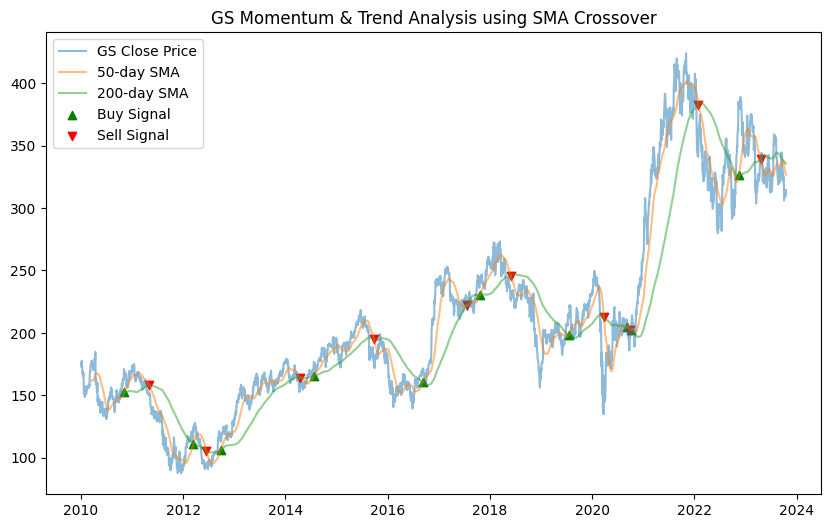

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_data(ticker_symbol):
    # Fetch historical data
    data = yf.download(ticker_symbol, start="2010-01-01", end="2023-10-17")
    return data['Close']

def sma_crossover(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window).mean()
    signals['long_mavg'] = data.rolling(window=long_window).mean()

    # Create signals
    signals['signal'] = 0.0
    signals.iloc[short_window:, signals.columns.get_loc('signal')] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    return signals

tickers = ['AAPL', 'TSLA', 'IWM', 'GLD', 'TLT', 'GS']

for ticker in tickers:
    # Fetch data
    data = fetch_data(ticker)

    # Generate signals
    signals = sma_crossover(data)

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(data, label=f'{ticker} Close Price', alpha=0.5)
    plt.plot(signals['short_mavg'], label='50-day SMA', alpha=0.5)
    plt.plot(signals['long_mavg'], label='200-day SMA', alpha=0.5)
    plt.scatter(signals[signals['positions'] == 1.0].index,
                signals['short_mavg'][signals['positions'] == 1.0],
                label='Buy Signal', marker='^', color='g', alpha=1)
    plt.scatter(signals[signals['positions'] == -1.0].index,
                signals['short_mavg'][signals['positions'] == -1.0],
                label='Sell Signal', marker='v', color='r', alpha=1)
    plt.title(f'{ticker} Momentum & Trend Analysis using SMA Crossover')
    plt.legend()
    plt.show()
